AIRBNB

Predicting Price Of Listings Based On Rating (Variable; "Review Star Rating"), City (Variable; "Cities")

In [1]:
# PROPOSITION - Airbnb hosts often struggle to set competitive prices for their listings. Setting the right price is crucial for maximizing occupancy rates and revenue.
# OBJECTIVE - This project aims to develop a predictive model that helps Airbnb hosts set optimal listing prices based on various factors such as 'Location', 'Property Type' & 'Capacity'.

In [1]:
import sklearn
import numpy
import pandas

print(sklearn.__version__)
print(numpy.__version__)
print(pandas.__version__)

1.4.1.post1
1.26.4
2.2.1


In [2]:
# IMPORT DATABASE

import pandas as pd
All_Data_DF = pd.read_csv ("archive/airbnb-listings.csv", sep=";")


/var/folders/xd/vcsdwksd2zq_6lnn_0jfzhj40000gn/T/ipykernel_22300/1041867463.py:4: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  All_Data_DF = pd.read_csv ("archive/airbnb-listings.csv", sep=";")


In [3]:
# DISPLAY SIZE OF DATABASE

All_Data_DF.shape

(494954, 89)

In [4]:
# DISPLAY NAMES OF COLUMNS (FEATURES)

All_Data_DF.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
All_Data_DF['Property Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 494954 entries, 0 to 494953
Series name: Property Type
Non-Null Count   Dtype 
--------------   ----- 
494943 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [6]:
# DISPLAY LAYOUT OF DATABASE

All_Data_DF.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [7]:
# FIND 'MEAN' VALUE OF VARIABLE/COLUMN: "Price (per night)"

All_Data_DF["Price"].mean()

138.0727028558756

In [8]:
# DEFINING NEW DATASET FOR DESCRIPTIVE STATISTICS

df1 = All_Data_DF[["Price", "Review Scores Rating", "City", "Country","Property Type", "Accommodates", "Number of Reviews", "Beds", "Room Type", "Security Deposit"]].copy()

df1.head()

,Price,Review Scores Rating,City,Country,Property Type,Accommodates,Number of Reviews,Beds,Room Type,Security Deposit
0,600.0,89.0,Amsterdam,Netherlands,Apartment,6.0,31.0,3.0,Entire home/apt,500.0
1,175.0,99.0,Amsterdam,Netherlands,Apartment,4.0,15.0,2.0,Entire home/apt,400.0
2,125.0,100.0,Amsterdam,Netherlands,Apartment,4.0,1.0,2.0,Entire home/apt,NaN
3,130.0,97.0,Amsterdam,Netherlands,Apartment,4.0,22.0,4.0,Entire home/apt,100.0
4,80.0,78.0,Amsterdam,Netherlands,Apartment,2.0,16.0,1.0,Entire home/apt,100.0


In [58]:
All_Data_DF[All_Data_DF["City"] == '三藩市']

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
385534,17769308,https://www.airbnb.com/rooms/17769308,20170401232214,2017-04-02,Apartment in San Francisco,Chic and elegant one bedroom apartment located...,NaN,Chic and elegant one bedroom apartment located...,none,NaN,...,NaN,NaN,NaN,NaN,SAN FRANCISCO,flexible,1.0,NaN,"37.773357398412365, -122.41705151369432","Host Has Profile Pic,Instant Bookable"


In [9]:
# DEFINING NEW DATASET TO LIMIT 'COUNTRY´ TO ONLY DISPLAY: UNITED STATES

df2 = df1[df1['Country'] == 'United States']
df2.shape

(134545, 10)

In [10]:
df2.head()

,Price,Review Scores Rating,City,Country,Property Type,Accommodates,Number of Reviews,Beds,Room Type,Security Deposit
901,150.0,NaN,Los Angeles,United States,Apartment,2.0,0.0,1.0,Private room,NaN
902,175.0,NaN,Los Angeles,United States,House,8.0,0.0,4.0,Entire home/apt,300.0
903,79.0,NaN,Los Angeles,United States,Guesthouse,3.0,0.0,1.0,Entire home/apt,NaN
904,175.0,100.0,Woodland Hills,United States,Other,2.0,2.0,1.0,Entire home/apt,500.0
905,450.0,95.0,Los Angeles,United States,Townhouse,6.0,8.0,4.0,Entire home/apt,NaN


In [11]:
# CHECKING FOR DUPLICATE VALUES & DROPPING THEM

df2.duplicated().sum()
df2.drop_duplicates (inplace=True)


/var/folders/xd/vcsdwksd2zq_6lnn_0jfzhj40000gn/T/ipykernel_22300/3513896534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates (inplace=True)


In [12]:
# HANDLING MISSING VALUES IN 'Review Scores Rating' BY INSERTING 'MEAN VALUES'

df2.loc[:, 'Review Scores Rating'] = df2['Review Scores Rating'].fillna(df2['Review Scores Rating'].mean())

In [13]:
# DROPPING ROWS WITH MISSING 'Price', 'Property Type' OR 'Accommodates'

df2 = df2.dropna(subset=['Price', 'Property Type', 'Accommodates'])

In [14]:
# handle missing values for 'Review Scores Rating' by filling with mean value
df2.loc[:, 'Review Scores Rating'] = df2['Review Scores Rating'].fillna(df2['Review Scores Rating'].mean())

In [15]:
# HANDLING MISSING VALUES vFOR 'Security Deposit' BY INSERTING WITH '0` (ASSUME NO DEPOSIT)

df2.loc[:, 'Security Deposit'] = df2['Security Deposit'].replace('[\$,]', '', regex=True).astype(float)
df2.loc[:, 'Security Deposit'] = df2['Security Deposit'].fillna(0)

In [16]:
# CHECKING FOR NULL VALUES VALUES

df2.isnull().sum()

Price                     0
Review Scores Rating      0
City                     58
Country                   0
Property Type             0
Accommodates              0
Number of Reviews         0
Beds                    218
Room Type                 0
Security Deposit          0
dtype: int64

Descriptive Statistics

In [17]:
# FIND 'MEAN', 'MEDIAN', 'STANDARD DEVIATION' & 'COUNT VALUE' OF VARIABLE/COLUMN: "Review Scores Rating" & COMPARE WITH OTHER VARIABLE: "Price (per night)"

Review_Scores_VS_Price = df1.groupby('Review Scores Rating')['Price'].agg(['mean', 'median', 'std', 'count'])
print(Review_Scores_VS_Price)


                            mean  median         std  count
Review Scores Rating                                       
20.0                  118.021631    74.0  128.445259    601
25.0                  770.000000   770.0         NaN      1
26.0                   59.000000    59.0         NaN      1
27.0                   52.600000    39.0   43.246965      5
28.0                   95.000000    95.0         NaN      1
...                          ...     ...         ...    ...
96.0                  135.467314    92.0  142.162165  23466
97.0                  139.219607    95.0  144.524619  22308
98.0                  142.313279    99.0  145.208959  21741
99.0                  145.757852   100.0  138.013886  10952
100.0                 150.108989    95.0  162.274872  93000

[70 rows x 4 columns]


In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,486996.0,138.072703,149.670499,0.0,55.0,90.0,150.0,999.0
Review Scores Rating,367134.0,92.913988,8.543725,20.0,90.0,95.0,100.0,100.0
Accommodates,494891.0,3.311584,2.094052,1.0,2.0,2.0,4.0,21.0
Number of Reviews,494952.0,16.740850,32.336701,0.0,1.0,4.0,18.0,735.0
Beds,494037.0,1.934525,1.488128,0.0,1.0,1.0,2.0,19.0
Security Deposit,204012.0,274.126703,171.605763,0.0,150.0,200.0,350.0,999.0


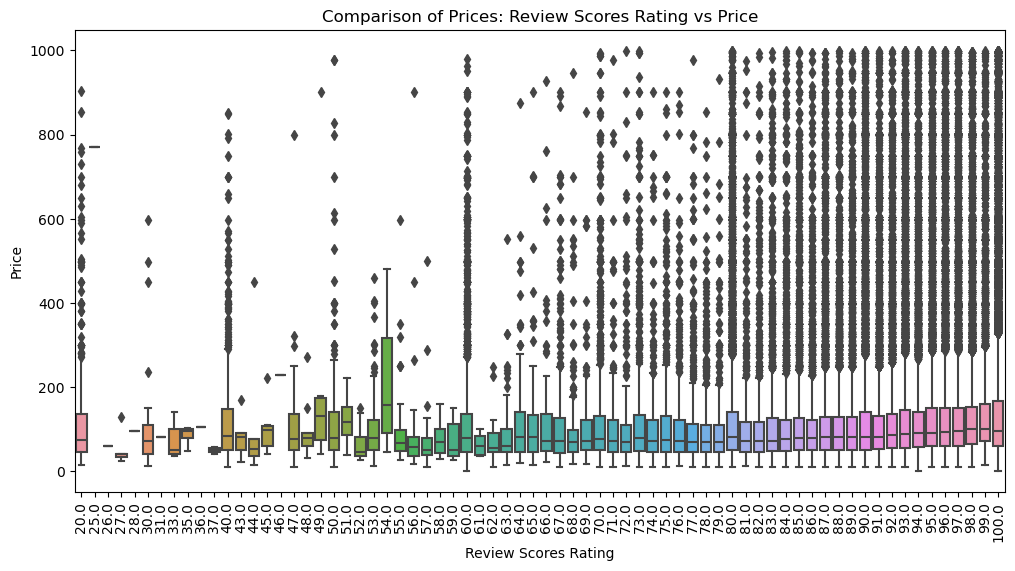

In [19]:
# PLOTTING - VISUALISING RELATIONSHIP BETWEEN VARIABLES: "Review Scores Rating" & "Price (per night)" (BOXPLOT)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
sns.boxplot(x='Review Scores Rating', y='Price', data=df1)
plt.title('Comparison of Prices: Review Scores Rating vs Price')
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


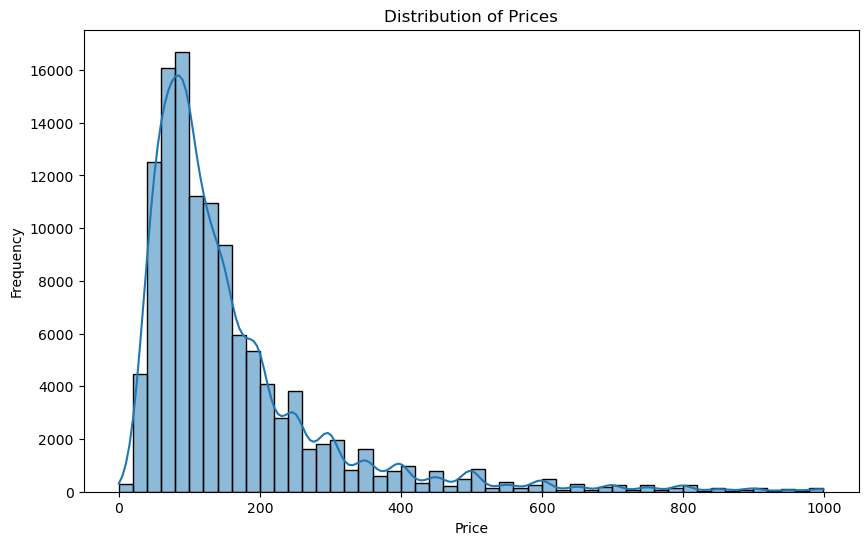

In [20]:
# PLOTTING - VISUALISING 'Distribution Of Prices´ (HISTOGRAM)

plt.figure(figsize=(10, 6))
sns.histplot(df2['Price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

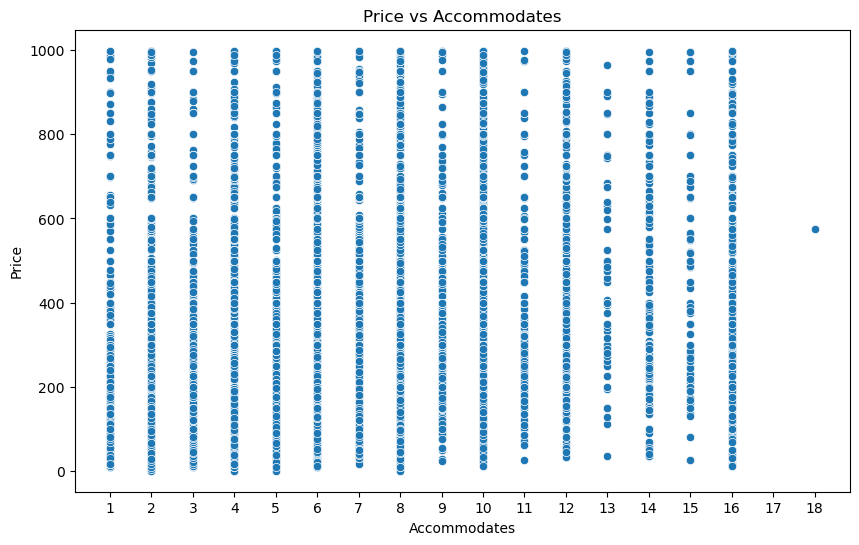

In [21]:
# PLOTTING - VISUALISING RELATIONSHIP BETWEEN 'Price' & 'Accommodates' (SCATTERPLOT)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accommodates', y='Price', data=df2)
plt.title('Price vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.xticks(range(int(df2['Accommodates'].min()), int(df2['Accommodates'].max()) + 1))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32445 (\N{CJK UNIFIED IDEOGRAPH-7EBD}) missing from current font.
  fig.canvas.print_figure(b

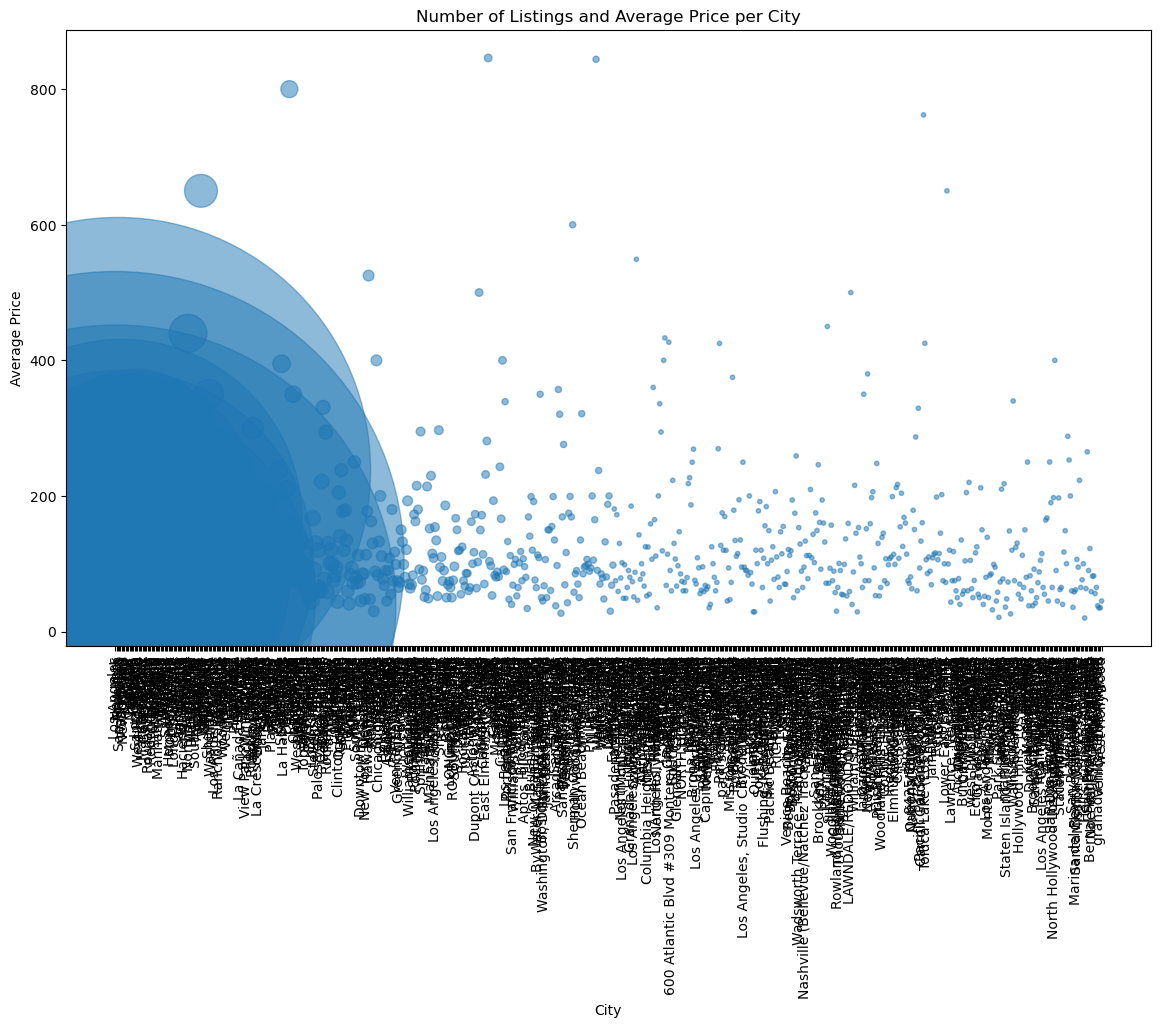

In [22]:
# PLOTTING - VISUALISING NUMBER OF LISTINGS PER 'City' (BUBBLE PLOT)

plt.figure(figsize=(14, 8))
city_counts = df2['City'].value_counts()
city_avg_price = df2.groupby('City')['Price'].mean()

plt.scatter(city_counts.index, city_avg_price, s=city_counts.values*10, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Number of Listings and Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34281 (\N{CJK UNIFIED IDEOGRAPH-85E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32016 (\N{CJK UNIFIED IDEOGRAPH-7D10}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22887 (\N{CJK UNIFIED IDEOGRAPH-5967}) missing from current font.
  fig.canvas.print_figure(b

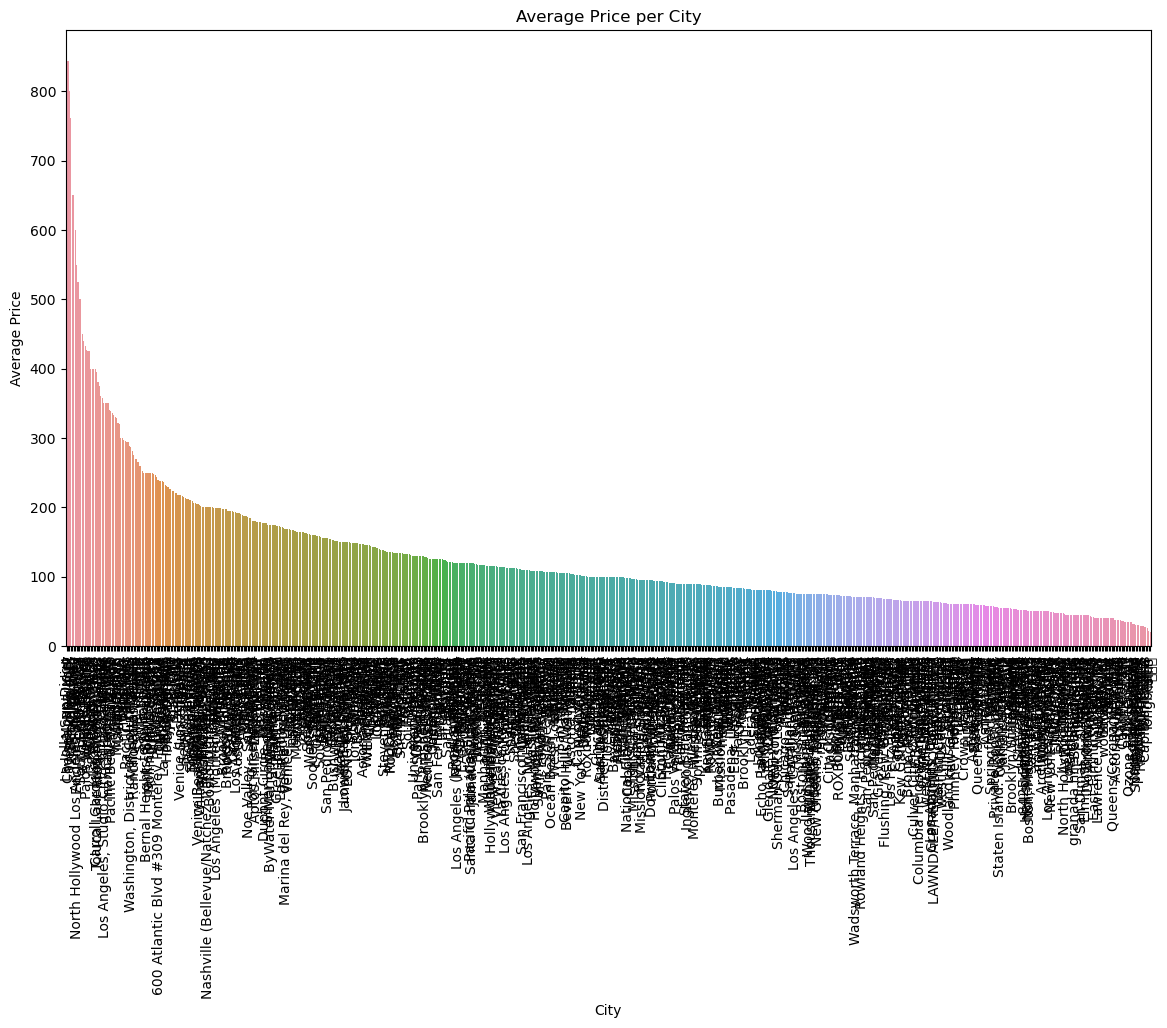

In [23]:
# PLOTTING - VISUALISING AVERAGE PRICE PER CITY (with 'Price' & 'City' Variables) (BAR PLOT)

plt.figure(figsize=(14, 8))
avg_price_city = df2.groupby('City')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=90)
plt.title('Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

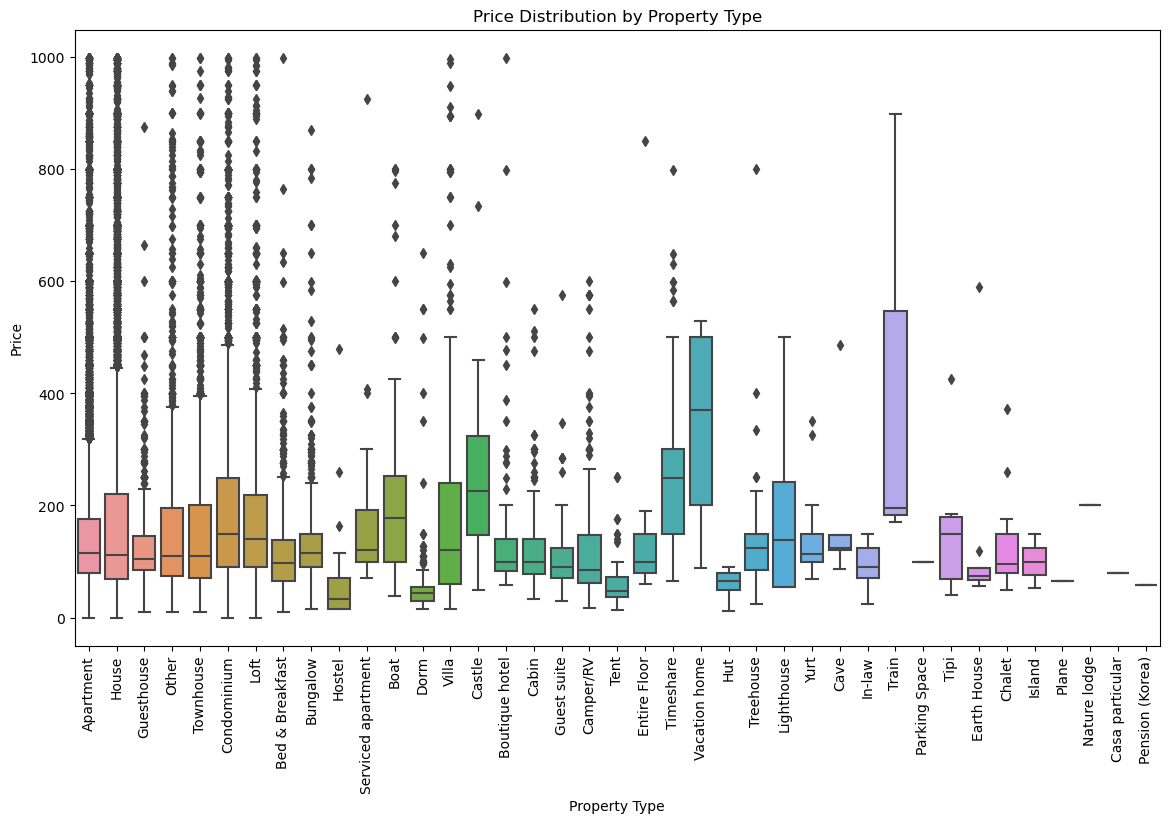

In [24]:
# plot of prices by property type

# PLOTTING - VISUALISING RELATIONSHIP BETWEEN 'Price' & 'Property Type' (BOX PLOT)

plt.figure(figsize=(14, 8))
sns.boxplot(x='Property Type', y='Price', data=df2)
plt.xticks(rotation=90)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

In [25]:
unique_property_type = df2['Property Type'].unique()

# Print the unique property types
print(unique_property_type)

['Apartment' 'House' 'Guesthouse' 'Other' 'Townhouse' 'Condominium' 'Loft'
 'Bed & Breakfast' 'Bungalow' 'Hostel' 'Serviced apartment' 'Boat' 'Dorm'
 'Villa' 'Castle' 'Boutique hotel' 'Cabin' 'Guest suite' 'Camper/RV'
 'Tent' 'Entire Floor' 'Timeshare' 'Vacation home' 'Hut' 'Treehouse'
 'Lighthouse' 'Yurt' 'Cave' 'In-law' 'Train' 'Parking Space' 'Tipi'
 'Earth House' 'Chalet' 'Island' 'Plane' 'Nature lodge' 'Casa particular'
 'Pension (Korea)']


In [26]:
# PREPARING FOR MODEL BY FACTORIZATION (using 'Label Encoder' - transforming 'Categorical (TEXT)' variables into 'Numerical (NUMBERED) variables)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

Factorized_Cities = LabelEncoder()
Factorized_Property = LabelEncoder()
df2.loc[:, 'City'] = Factorized_Cities.fit_transform(df2['City'])
df2.loc[:, 'Property Type'] = Factorized_Property.fit_transform(df2['Property Type'])

In [27]:
df2.City.nunique()

761

In [28]:
Property_Type_List = Factorized_Property.classes_
Factorized_Property.fit_transform(df2['Property Type'])

array([ 0, 18, 16, ...,  0, 18,  0])

In [29]:
Property_Type_Dict = {code: variable for code, variable in enumerate(Property_Type_List)}

In [30]:
Property_Type_Dict

{0: 'Apartment',
 1: 'Bed & Breakfast',
 2: 'Boat',
 3: 'Boutique hotel',
 4: 'Bungalow',
 5: 'Cabin',
 6: 'Camper/RV',
 7: 'Casa particular',
 8: 'Castle',
 9: 'Cave',
 10: 'Chalet',
 11: 'Condominium',
 12: 'Dorm',
 13: 'Earth House',
 14: 'Entire Floor',
 15: 'Guest suite',
 16: 'Guesthouse',
 17: 'Hostel',
 18: 'House',
 19: 'Hut',
 20: 'In-law',
 21: 'Island',
 22: 'Lighthouse',
 23: 'Loft',
 24: 'Nature lodge',
 25: 'Other',
 26: 'Parking Space',
 27: 'Pension (Korea)',
 28: 'Plane',
 29: 'Serviced apartment',
 30: 'Tent',
 31: 'Timeshare',
 32: 'Tipi',
 33: 'Townhouse',
 34: 'Train',
 35: 'Treehouse',
 36: 'Vacation home',
 37: 'Villa',
 38: 'Yurt'}

In [31]:
df2.head()

,Price,Review Scores Rating,City,Country,Property Type,Accommodates,Number of Reviews,Beds,Room Type,Security Deposit
901,150.0,94.082988,319,United States,0,2.0,0.0,1.0,Private room,0.0
902,175.0,94.082988,319,United States,18,8.0,0.0,4.0,Entire home/apt,300.0
903,79.0,94.082988,319,United States,16,3.0,0.0,1.0,Entire home/apt,0.0
904,175.0,100.000000,645,United States,25,2.0,2.0,1.0,Entire home/apt,500.0
905,450.0,95.000000,319,United States,33,6.0,8.0,4.0,Entire home/apt,0.0


In [32]:
City_List = Factorized_Cities.classes_

In [33]:
City_List

array(['2', '3f', '600 Atlantic Blvd #309 Monterey Park CA 91754',
       '8425 Elmhurst avenue', '92110', 'ALLSTON', 'ARVERNE', 'ASTORIA',
       'ASTORIA/LIC', 'Acton', 'Agoura Hills', 'Agoura hills',
       'Agua Dulce', 'Alhambra', 'Allston', 'Alpine', 'Altadena',
       'Antioch', 'Aptos', 'Aptos Hills-Larkin Valley', 'Arabi',
       'Arcadia', 'Arcadia, California, US', 'Archwood Acres Rio',
       'Artesia', 'Arverne', 'Ashland City', 'Astoria',
       'Astoria - New York', 'Astoria New York', 'Astoria Queens',
       'Astoria, N.Y.C.', 'Astoria, New York', 'Astoria, Queens',
       'Astoria,New York', 'Astoria,Queens', 'Auburndale', 'Aurora',
       'Austin', 'Austin, Texas, US', 'Austin, Texas, USA',
       'Austin/Lakeway', 'Avalon', 'Averne', 'Azusa', 'BAYSIDE', 'BK',
       'BRONX', 'BROOKLYN', 'Baldwin Park', 'Ballard, Seattle',
       'Bay Ridge', 'Bayside', 'Bayside, Queens', 'Bedstuy', 'Bee Cave',
       'Bel Air', 'Bell', 'Bell Gardens', 'Belle Harbor', 'Bellerose',
  

In [60]:
All_Data_DF[All_Data_DF["City"] == '2']

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
86569,7205903,https://www.airbnb.com/rooms/7205903,20170502132028,2017-05-03,Hotel-Like Living,Cozy studio near A/C train in Bedstuy. Less th...,Nice studio. Once inside you'll feel like you'...,Cozy studio near A/C train in Bedstuy. Less th...,none,Quick and easy commute to the city. Grocery st...,...,10.0,9.0,9.0,NaN,NaN,moderate,1.0,0.79,"40.68151834497352, -73.939347962608","Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
All_Data_DF[All_Data_DF["City"] == '40.68151834497352, -73.939347962608']

In [34]:
Factorized_Cities.fit_transform(df2['City'])

array([319, 319, 319, ..., 350, 601, 319])

In [35]:
City_Dict = {code: variable for code, variable in enumerate(City_List)}

In [36]:
Property_Type_Dict = {code: variable for code, variable in enumerate(Property_Type_List)}

In [37]:
# DROPPING NON-NUMERICAL & UNIMPORTANT COLUMNS

df2 = df2.drop(['Country', 'Room Type'], axis=1)

In [38]:
# CHECKING FOR REMAINING MISSING VALUES & IMPUTING THEM WITH VARIABLE 'MEAN' VALUE

Imputer = SimpleImputer(strategy='mean')
X = df2.drop('Price', axis=1)
X = pd.DataFrame(Imputer.fit_transform(X), columns=X.columns)

In [39]:
# SETTING TARGET FOR MODEL - 'Price'

y = df2['Price']

In [40]:
# ALLOWING FUNCTION OF 'SELECT K BEST' TO DETERMINE (5) BEST FEATURES FOR MODEL TESTING PARTNERED WITH 'F REGRESSION' TO SCORE THOSE VARIABLES

selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X, y)
best_features_indices = selector.get_support(indices=True)
best_features = X.columns[best_features_indices]
print("Best features:", best_features)

Best features: Index(['Property Type', 'Accommodates', 'Number of Reviews', 'Beds',
       'Security Deposit'],
      dtype='object')


In [41]:
# SPLITTING THE DATA FOR MODEL PREDICTION

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

In [42]:
# BUILDING MODEL (using 'Random Forest')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)

In [43]:
# OPTIMIZING OUTPUT WITH HYPERPARAMETIZATION (using 'Grid Search') & IDENTIFYING BEST MODEL OUTPUT

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# OUTPUT - Best Model
Best_RF_model = grid_search.best_estimator_
Best_RF_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.6s
[CV] END max

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [44]:
# SETTING TEST PREDICTIONS

y_pred = Best_RF_model.predict(X_test)

In [45]:
# TESTING MODEL WITH 'Mean Squared Error' DISPLAYING OUTPUT AS WILL BE NUMERICAL "NOT" CATAGORICAL (Hence 'Accuracy Score' Feature Cannot Be Applied!) & GETTING MODEL RESULT

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {r2}")

Mean Squared Error: 10811.744486396043
R-squared: 0.4193882932340246


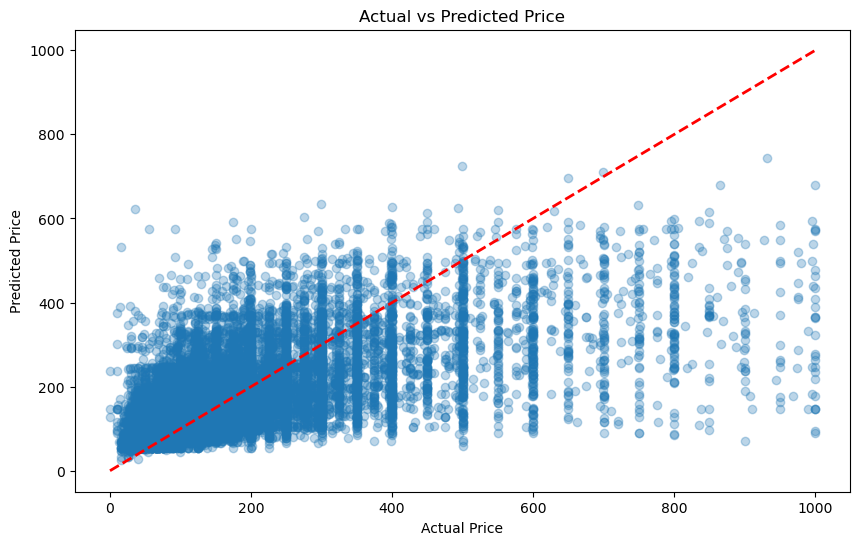

In [46]:
# FINALLY - PLOTTING RESULT OF PROJECT MODEL - ACTUAL VS PREDICTED PRICE FOR LISTING

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# UNDERSTANDING OUTPUT #
# Model's predictions are, on average, 10583.05 off, significantly off from the actual prices. 
# 10583.05 - Root Mean Squared Error = 102.88.
# $102.88 Average Difference Between Actual & Predicted Prices.

# 42% (from above 'R-Squared Value) of the variance in the actual prices indicates a moderate fit. Model captures some variability but still has significant variance not accounted for in model.

# EXPLAINING MODEL PREDICTION VISUALISATION PLOT
# Predicted prices increase with actual prices, but there is substantial spread around the trend line.
# Points scattered widely from trend line, illustrating probable prediction errors.

In [47]:
# SAVING MODEL

import pickle

with open('Best_RF_model.pkl', 'wb') as f:
    pickle.dump(Best_RF_model, f)

In [48]:
# Streamlit Build in Streamlit.ipynb file

In [49]:
## FERNANDA ##

# Underpredicting for higher actual prices (past $500)

# ? Setting alternate hyperparameters

# ? Refining feature set to include more variables / price variances

# ? Alternate model

In [50]:
########################################################   NEW FROM OLD WORK  ##############################################################################
############################################################################################################################################################
############################################################################################################################################################

In [51]:
Filtered_City_List = df2['City'].value_counts()[df2['City'].value_counts() > df2.City.value_counts().mean()]

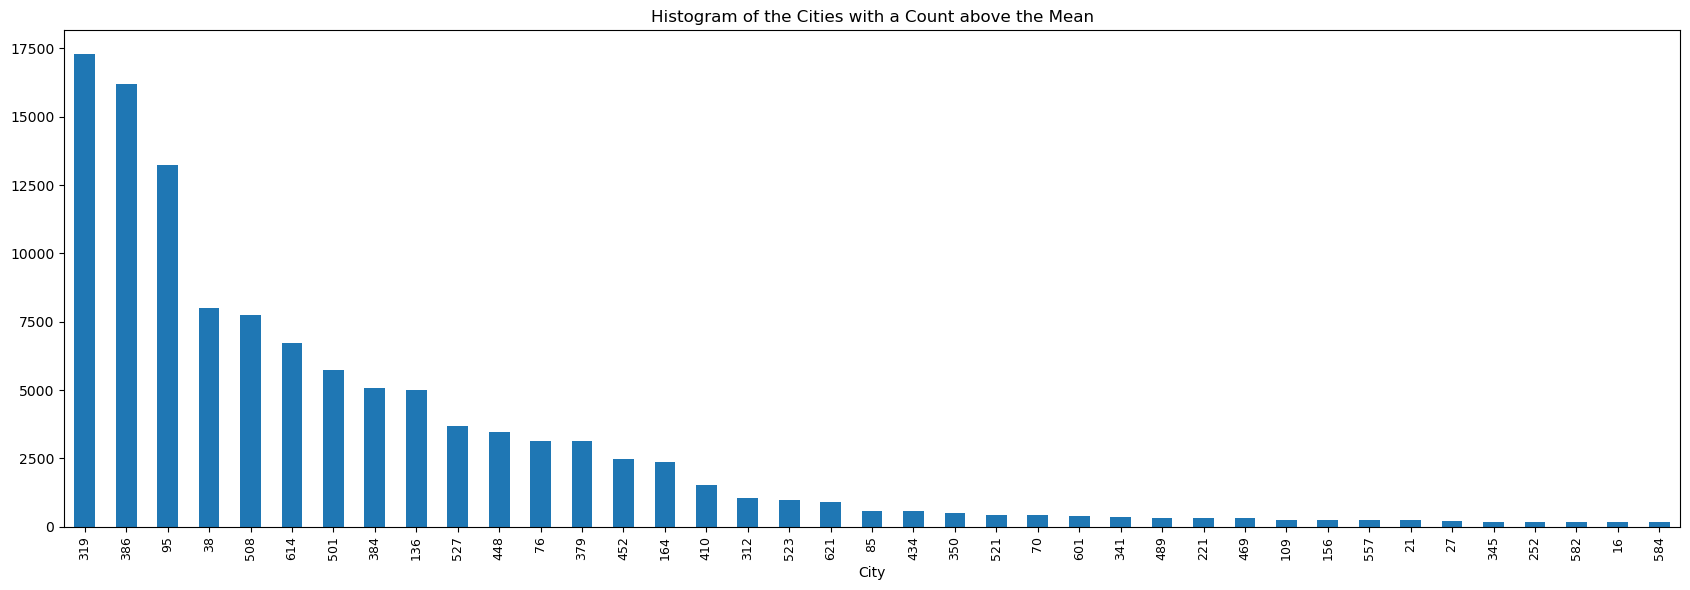

In [52]:
# PLOTTING - VISUALISING RELATIONSHIP BETWEEN VARIABLES: "Cities" & MEAN VALUES OF "Price (per night)"

plt.figure(figsize=(17,6))
Filtered_City_List.plot(kind='bar')
plt.xticks(fontsize=9)
plt.title('Histogram of the Cities with a Count above the Mean')
plt.tight_layout()
plt.show()

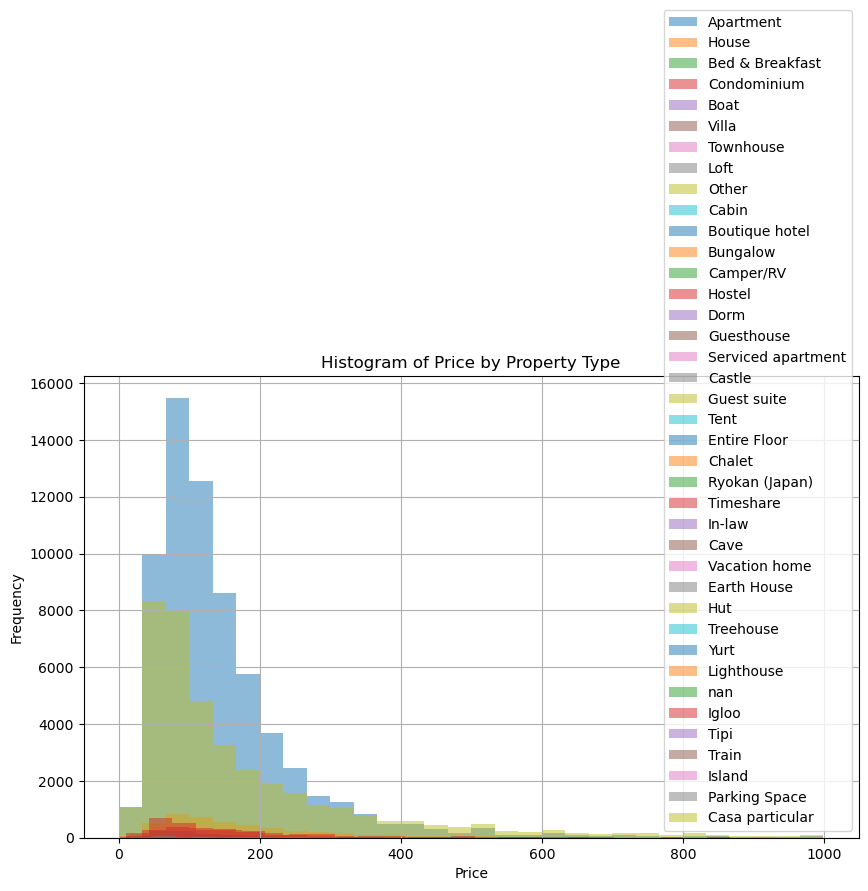

In [53]:
# PLOTTING - VISUALISING RELATIONSHIP BETWEEN VARIABLES: "Property Type" & "Price (per night)"

Property_Type_List = df2.groupby('Property Type')['Price'].hist(alpha=0.5, bins=30, figsize=(10, 6))

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price by Property Type')
plt.legend(All_Data_DF['Property Type'].unique())
plt.show()

In [54]:
# # HANDLE THESE MISSING VALUES BY INPUTTING THE 'Mean´ VALUE IN THEIR PLACE (So minimises their influence in later results)

#y_imputed = y.fillna(y.mean())

In [55]:
# ENCODING CATGORICAL VARIABLES & SETTING AXIS

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

X = pd.get_dummies(df2[['Property Type', 'City']])
y = df2['Price']

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120099 entries, 901 to 494914
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 120099 non-null  float64
 1   Review Scores Rating  120099 non-null  float64
 2   City                  120099 non-null  object 
 3   Property Type         120099 non-null  object 
 4   Accommodates          120099 non-null  float64
 5   Number of Reviews     120099 non-null  float64
 6   Beds                  119881 non-null  float64
 7   Security Deposit      120099 non-null  float64
dtypes: float64(6), object(2)
memory usage: 8.2+ MB


In [57]:
df2["Room Type"].value_counts()



KeyError: 'Room Type'

In [ ]:
Room_Type = {"Entire home/apt":1, "Private room":2, "Shared room":3}
df2["Room Type"] = df2["Room Type"].replace(Room_Type)

/var/folders/xd/vcsdwksd2zq_6lnn_0jfzhj40000gn/T/ipykernel_2342/1242415962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Room Type"] = df2["Room Type"].replace(Room_Type)


In [ ]:
# FACTORIZING 'Property Type' COLUMN & ALIGNING THAT NEW COLUMN NEXT TO IT - MAKING A CLEAR REFERENCE OF WHAT NUMBER EQUATES TO WHAT 'PROPERTY TYPE'

df2 ["Property Type Factorize"],categories=pd.factorize(df2["Property Type"])
Property_Columns = ['Property Type', 'Property Type Factorize'] + [col for col in df2.columns if col not in ['Property Type', 'Property Type Factorize']]
df2 = df2[Property_Columns]

/var/folders/xd/vcsdwksd2zq_6lnn_0jfzhj40000gn/T/ipykernel_2342/955610538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 ["Property Type Factorize"],categories=pd.factorize(df2["Property Type"])


In [ ]:
df2 ["City Factorize"],categories=pd.factorize(df2["City"])
City_Columns = ['City', 'City Factorize'] + [col for col in df2.columns if col not in ['City', 'City Factorize']]
df2 = df2[City_Columns]

In [ ]:
# DROPPING 'Country' FROM DATASET 

#df2.drop(columns=['Country'], inplace=True)

In [ ]:
df2.head()

,City,City Factorize,Property Type,Property Type Factorize,Price,Review Scores Rating,Accommodates,Number of Reviews,Beds,Room Type,Security Deposit
901,Los Angeles,0,Apartment,0,150.0,NaN,2.0,0.0,1.0,2,NaN
902,Los Angeles,0,House,1,175.0,NaN,8.0,0.0,4.0,1,300.0
903,Los Angeles,0,Guesthouse,2,79.0,NaN,3.0,0.0,1.0,1,NaN
904,Woodland Hills,1,Other,3,175.0,100.0,2.0,2.0,1.0,1,500.0
905,Los Angeles,0,Townhouse,4,450.0,95.0,6.0,8.0,4.0,1,NaN


In [ ]:
# # ISSUES # #

#1 - What is the 'Room Type' factorising? ONLY 3 TYPES ANYWAY
#2 - How to deal with NaN values in 'Review Scores Rating' & 'Security Deposit'? - SUGGESTION: REMOVE
#3 - Do I have enough from this data to compile a model for price prediction (using K Best) for a property?

# IDEA - A property buyer will use the streamlit app in order to assess which City they should list theirs for, depending on City, Property Type, etc ##

In [ ]:
#Factorise City & Security Deposit before executing below CELL

In [ ]:
#X = df2.drop(["Price","Review Scores Rating", "City", "Country", "Property Type"],axis=1)

In [ ]:
# y = df2 price with Select K Best & don't forget Null Values in Price & S.Deposit
# 

In [ ]:
# INSTRUCTING MODEL TO FIND THE '5' BEST FEATURES FOR ANALYSIS & PREDICTION (Using 'KBest´)

k_best_features = SelectKBest(score_func=f_regression, k=5)
X_kbest = k_best_features.fit_transform(X, y_imputed)

In [ ]:
K_Best_Variables = k_best_features.get_support(indices=True)

In [ ]:
Best_Features = X.columns[K_Best_Variables]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
missing_values = np.isnan(y_train).sum()
print("Number of missing values in y_train:", missing_values)

Number of missing values in y_train: 1089


In [ ]:
y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

In [ ]:
grid_search.fit(X_train, y_train_imputed)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train_imputed)

RandomForestRegressor(min_samples_split=10)

In [ ]:
y_pred = best_rf_model.predict(X_test)
y_pred

array([144.50945646, 144.50945646, 144.50945646, ..., 144.50945646,
       199.34229167, 144.50945646])

In [ ]:
y_pred_no_nan = np.nan_to_num(y_pred, nan=np.nanmean(y_pred))
y_test_no_nan = np.nan_to_num(y_test, nan=np.nanmean(y_test))

In [ ]:
mse = mean_squared_error(y_test_no_nan, y_pred_no_nan)
print("Mean Squared Error:", mse)

Mean Squared Error: 18724.805512899075


In [ ]:
###########################################################################################################################

###########################################################################################################################

###########################################################################################################################